In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORTANT
---
> Durée de l'épreuve 3h.<br>
> Les documents, les calculatrices et les téléphones portables sont interdits.<br>
> Toute réponse devra être justifiée.<br>
> Toutes les fonctions que vous proposerez devront contenir des commentaires même succints.
---
> Pour certaines questions théoriques, vous devrez répondre sur votre copie en précisant bien le numéro de la question. Pour les questions numériques, vous devez compléter le notebook. Parties A et B sont indépendantes.
---
> Lorsque vous aurez terminer l'épreuve, vous devez **sauvegarder votre travail** en cliquant sur la petite disquette en haut à gauche puis **quitter le notebook** en cliquant sur `file` puis `close and halt`.<br>
> Puis vous devez quitter `jupyter-notebook` en retournant dans le `terminal` et en suivant les instructions : `CTRL+C` suivi de `y`.

# Partie A: modèles dynamiques et schémas pour EDOs

### Exercice 1. Schéma d'Adams-Bashforth à deux pas

Nous allons programmer une méthode dite *à deux pas* pour construire une solution approchée du problème de Cauchy 
\begin{equation}
\left\lbrace
\begin{aligned}
&y'(t)= f(t, y(t)),&& t \in [0, T],\\
&y(0) = y_0.
\end{aligned}
\right.
\tag{1}\label{1}
\end{equation}

On va calculer des valeurs approchées de la solution aux instants $t^n =n\Delta t$, où $\Delta t>0$ est un pas de temps et $ n = 0, 1, \ldots, N $ avec $ N = \frac{T}{\Delta t} $. On dénote $ y^n $ la valeur approchée de $ y( t^n ) $ à l'instant $ t^n $. 

On rappelle que la fonction $y$, supposée $C^1$, est la solution du problème de Cauchy (1) si et seulement si, pour toute suite strictement croissante $(t^n)_{n\in\mathbb{N}}$, avec $t^0=0$, on a
\begin{equation}
\left\{
\begin{array}{l}
y(t^{n+1})= y(t^n) +\int_{t^n}^{t^{n+1}} f(s,y(s)) ds,\\
y(t^0) = y_0.
\end{array}
\right .
\tag{2}\label{2}
\end{equation}

La méthode d’Adams-Bashforth à 2 pas (en abrégé AB2) s’obtient en approximant la fonction $ t \mapsto f(t,y(t)) $ sur le segment $ [t^n, t^{ n+1 } ] $ par son polynome interpolateur aux points $ t^{ n-1 } $, $ t^{ n } $.

**Question 1.**

> Soit $ P $ le polynome interpolateur de $ t \mapsto f(t,y(t)) $ aux points $ t^{ n-1 } $, $ t^{ n } $.
Quel est le degré de $ P $? Donner l'expression de $ P $ en termes de $ t^{ n-1} $, $ t^{ n } $, $ f( t^{n-1}, y( t^{n-1} ) ) $, $ f( t^{ n }, y( t^{ n } ) ) $.

In [ ]:
# Utilisez votre copie

**Question 2.**

> En remplacant $ f( s, y( s ) ) $ par l'expression de son polynome interpolateur $ P $ dans l'intégrale de (2) et en utilisant l'approximation $ y( t^n ) \approx y^n $, montrez que l'on obtient le schéma numérique suivant:
\begin{equation}
\left\lbrace
\begin{aligned}
& y^{ n + 1 } = y^n + \Delta t \left( \frac{3}{2}f( t^n, y^n ) - \frac{1}{2} f( t^{n-1}, y^{n-1} ) \right), \quad n = 1, 2, \ldots, N - 1, \\
&y^0 = y_0.
\end{aligned}
\right.
\tag{3}\label{3}
\end{equation}

In [ ]:
# Utilisez votre copie

Ce schéma est appelé **le schéma d'Adams-Bashforth à deux pas (AB2)**. 

**Question 3.**

> Programmez la méthode AB2 afin de calculer la solution approchée d'un problème de Cauchy scalaire générique (1). On écrira une fonction `AB2` qui prend en argument une fonction `f` (la fonction qui définit l'équation différentielle du problème (1)), un nombre `y0` (la valeur initiale), un nombre `T` (la longueur de l'intervalle de temps) et un nombre `N ` (le nombre de points), et qui retourne deux tableaux : `t`, constitué des instants $ 0, \Delta t, 2 \Delta t, \ldots, N \Delta t $, avec $ \Delta t = T / N $, et `y`, constitué des valeurs de la solution approchée en ces instants.

On remarque que les équations (3) du schéma AB2 ne précisent pas comment calculer $ y^1 $. Pour calculer $ y^1 $ à partir de $ y^0 $ on utilisera le schéma d'Euler explicite sur le segment $ [ t^0, t^1 ] $.

In [15]:
def AB2 (f, y0, T , N):
    t = np.zeros (N+1,)
    y = np.zeros (N+1,)
    delta_t = T/N
    
    y[0] = y0
    f0 = f(t[0],y[0])
    
    t[1] = delta_t
    y[1] = y[0] + delta_t * f0
    f1 = f(t[1],y[1])
    
    for i in range(1,N):
        t[i+1] = t[i] + delta_t
        y[i+1] = y[i] + 0.5 * delta_t * (3 * f1 - f0)
        f0,f1 = f1,f(t[i+1],y[i+1])
        
    return t, y

Nous allons tester la méthode AB2 sur l'équation logistique: 
\begin{equation}
y'(t) = r \; y(t) \Bigl( 1 - \frac{y(t)}{K} \Bigr), \quad t \in [ 0, T ],
\tag{4}
\end{equation}
où $r$ et $K$ sont deux paramètres strictement positifs. On rappelle que la solution exacte de cette équation différentielle passant par $ y_0 $ à l'instant $ t = 0 $ est donnée par la formule suivante: 
$$
y(t) = \frac{K}{1 + \bigl(\frac{K}{y_0}-1\bigr) \text{e}^{-rt}}, \quad t \in [ 0, T ]. 
$$

**Question 4.**

> Représentez sur le même graphique la solution exacte du modèle logistique et plusieurs solutions approchées calculées à l'aide de la fonction `AB2` pour différentes valeurs de $N$ : 10, 20, 30, 40.  On pourra prendre $ r = 2 $, $ K = 100 $ dans le modèle logistique, $ y_0 = 0.1 $, $ T = 5 $. Ajoutez un titre et une légende.

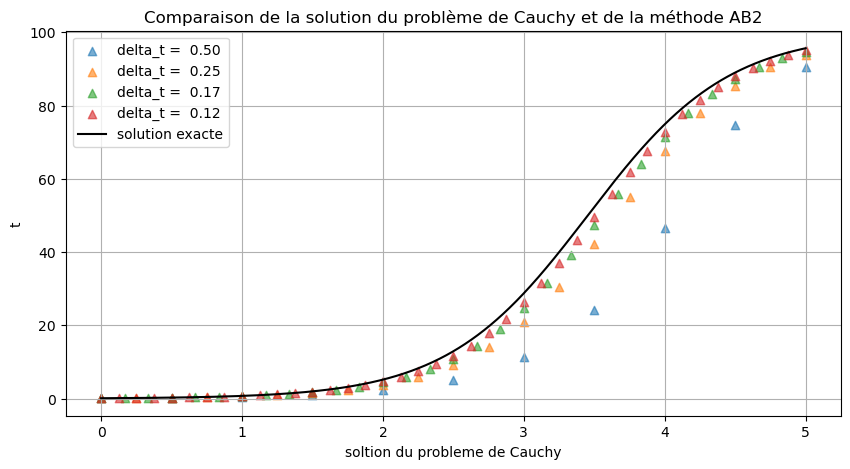

In [25]:
# Paramètres
r,K = 2 , 100
y0 = 0.1
T = 5 
liste_N = [10,20,30,40]

def f (t,y):
    return r*y*(1-y/K)

def sol_exact (t, y0):
    return K/ (1 + (K/y0 - 1)*np.exp(-r*t))

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)

for k , N in enumerate(liste_N):
    t,sol_app = AB2(f,y0,T,N)
    ax.scatter(t,sol_app, label =f'delta_t = {T/N : .2f}', marker = '^', alpha = 0.6 )
    
tt = np.linspace(min(t) , max(t) , 1000)
ax.plot(tt,sol_exact(tt,y0), label = f'solution exacte', color='black')
ax.grid(True)
ax.set_xlabel('soltion du probleme de Cauchy')
ax.set_ylabel('t')
ax.set_title('Comparaison de la solution du problème de Cauchy et de la méthode AB2')
ax.legend()

**Question 5.**

> Estimez l'ordre de convergence apparent du schéma AB2 pour l'équation logistique ci-dessus. On rappelle que pour cela on pourra:
> - calculer les erreurs globales $ e $ du schéma AB2 pour l'équation logistique pour différentes valeurs de $\Delta t$;
> - tracer $e$ en fonction de $\Delta t$;
> - tracer sur le même graphique les courbes $y = C\Delta t^p$ pour de différentes valeurs de $ p $ où $C=\frac{e[-1]}{\Delta t[-1]^p}$ qui correspond à la plus petite valeur de pas de temps.
> - passer en échelle logarithmique en $x$ et en $y$ à l'aide des commandes `ax.set_xscale("log")` et `ax.set_yscale("log")`.

### Exercice 2. Modèle logistique avec le terme d'effet d'Allee

On suppose maintenant que l'équation (4) décrit l'évolution d'une population de truites dans un étang, i.e. $ y $ est l'effectif de la population des truites, $ r $ est le taux de croissance de la population des truites et $ K $ est la capacité d'acceuil du milieu. On prendra dans cet exercice $ r = 2 $, $ K = 100 $, $ T = 10 $.

**Question 6.**

> Tracez la solution du modèle logistique (4) pour $ y_0 $ prenant les valeurs $ 1, 10, 20, 30, 40, 50 $. Sur le même graphique tracez la droite $ y = K $. Donnez une interprétation des graphes obtenus. Le résultat est-il réaliste pour de petites valeurs de $ y_0 $ ? Expliquer le défaut principal du modèle logistique pour la description des populations à petits effectifs.

In [ ]:
# Ecrivez votre code ici, utilisez votre copie pour répondre aux questions théoriques

On considère maintenant le modèle logistique avec un terme d'effet d'Allee:
\begin{equation}
y'(t) = r \; y(t) \Bigl( 1 - \frac{y(t)}{K} \Bigr) \Bigl( \frac{y(t) - A }{K} \Bigr), \quad t \in [ 0, T ],
\tag{5}\label{5}
\end{equation}
où $ A $ est une constante positive. On prendra dans cet exercice $ A = 24 $.

**Question 7.**

> - Calculez la solution de l'équation (5) pour $y_0$ prenant les valeurs $ 1, 10, 20, 30, 40, 50 $ à l'aide de la fonction `AB2` programmée dans la question 3, ou, à défaut, à l'aide de la commande `odeint` du module `scipy.integrate`.
> - Tracez les graphes des solutions obtenues sur le même graphique.
> - Tracez les droites $ y = A $ et $ y = K $.
> - Interprétez les résultats obtenus. Le modèle proposé est-il meilleur que le modèle logistique pour décrire le comportement des populations à petits effectifs ? A votre avis comment peut-on interpréter le coefficient $ A $ ?

In [ ]:
# Ecrivez votre code ici, utilisez votre copie pour répondre aux questions théoriques

# Partie B: interpolation 

### Exercice 3. Interpolation trigonométrique

Dans cet exercice, nous proposons une méthode d'interpolation pour les fonctions périodiques. Pour simplifier, nous supposerons que l'intervalle de définition des fonctions est $[0, 2\pi]$ et nous supposerons que les points d'interpolation sont équi-répartis.

Nous posons donc $a=0$, $b=2\pi$ et nous définissons les $N$ points d'interpolation
$$
x_{k,N} = a + (b-a)\frac{k}{N} = \frac{2k\pi}{N}, 
\qquad 0\leq k < N.
$$

In [ ]:
a, b = 0, 2*np.pi

**Question 1** (Noyau de Dirchlet)

Dans le cas $N$ impair, le noyau de Dirichlet s'écrit
$$
D_N(x) = \left\lbrace \begin{aligned} 
&\frac{\sin(Nx/2)}{N\sin(x/2)} && \text{si } x\notin 2\pi\mathbb{Z},\\ 
&1 && \text{si } x\in 2\pi\mathbb{Z}. 
\end{aligned} \right.
$$
Dans le cas $N$ pair, le noyau de Dirichlet s'écrit
$$
D_N(x) = \left\lbrace \begin{aligned} 
&\frac{\sin(Nx/2)}{N\tan(x/2)} && \text{si } x\notin 2\pi\mathbb{Z},\\ 
&1 && \text{si } x\in 2\pi\mathbb{Z}. 
\end{aligned} \right.
$$

> 1. Programmez une fonction `D` qui prend deux arguments en entrée : `N` une variable de type `int` et `x` une variable de type `ndarray` et qui retourne un `ndarray` de la même taille que celle de `x` contenant l'évaluation du noyau de Dirichlet $D_N$ aux points du tableau `x`.
> 2. Dans une fenêtre graphique, tracez les différents noyaux de Dirichlet dans des sous-figures séparées pour $N$ allant de $1$ à $6$.
> 3. A l'aide de `scatter`, placez un petit cercle aux points $(x_{k, N}, D_N(x_{k,N}))$, $0\leq k<N$, sur chaque sous-figure. 

Vous pouvez essayer d'obtenir une figure ressemblant à celle ci-dessous :
![DN](DirichletKernel.png)

In [6]:
# Ecrivez votre code ici


**Question 2** (Interpolation)

Pour $N$ un entier non nul et $(y_0,\ldots,y_{N-1})\in\mathbb{R}^N$, on peut démontrer qu'il existe un unique polynôme trigonométrique de la forme
$$
P(x) = \alpha_0 + \sum_{k=0}^{N//2} \alpha_k \cos(kx) + \sum_{k=0}^{(N-1)//2} \beta_k \sin(kx),
$$
qui vérifie
$$
P(x_{k,N}) = y_k, \qquad 0\leq k<N.
$$
On démontre ensuite que, si les points $x_{k,N}$, $0\leq k<N$, sont équi-répartis, le polynôme trigonométrique $P$ peut se réécrire
$$
P(x) = \sum_{k=0}^{N-1} y_k D_N(x-x_{k,N}).
$$

> 1. Programmez une fonction `interp_trig(f, N, xx)` qui prend en argument $f$ une fonction, `N` un entier et `xx` un `ndarray` et qui retourne un `ndarray` contenant les valeurs de $P(\verb!xx!)$ où $P$ est le polynôme trigonométrique dont la formule est donnée plus haut.
> 2. Pour la fonction $x\mapsto \sin(3x)+\cos(5x)$, testez votre fonction `interp_trig` en affichant le polynôme interpolateur obtenu avec $N\in\lbrace 3, 7, 10\rbrace$. 

In [ ]:
# Ecrivez votre code ici